In [106]:
import numpy as np
import pandas as pd
df=pd.read_csv("D:\python\Bengaluru_House_Data.csv")

In [107]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [108]:
df.shape

(13320, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [110]:
del df['availability']

In [151]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [111]:
del df['society']

In [150]:
df.dropna(inplace=True)

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


In [114]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

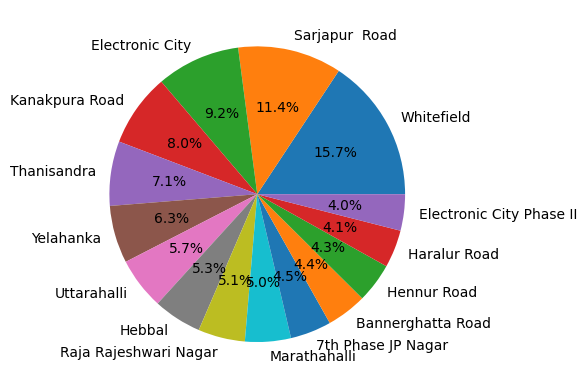

In [115]:
values=df['location'].value_counts()[:15]
names=df['location'].value_counts().index[:15]
plt.pie(values,labels=names,autopct='%1.1f%%')
plt.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12710 non-null  object 
 1   location    12710 non-null  object 
 2   size        12710 non-null  int32  
 3   total_sqft  12668 non-null  float64
 4   bath        12710 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       12710 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 744.7+ KB


In [117]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

In [122]:
df['size'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [119]:
df['size']=df['size'].str.split('BHK').str[0]
df['size']=df['size'].str.split('Bedroom').str[0]
df['size']=df['size'].str.split('RK').str[0]

In [120]:
df['size']=df['size'].astype(int)

In [121]:
import pandas as pd


def convert_total_sft(text):
    text = text.strip()  # Remove leading and trailing whitespace
    if '-' in text:  # If the value is in a range format
        lower, upper = map(float, text.split('-'))
        return (lower + upper) / 2  # Taking average of the range
    elif 'acres' in text:  # If the value is in acres
        acres = float(text.split()[0])  # Extracting the number of acres
        # Assuming 1 acre = 43560 square feet
        return acres * 43560
    else:  # If it's already in square feet
        try:
            return float(text)  # Convert to float
        except ValueError:
            return None  # Handle cases where the conversion fails

# Apply the function to convert total_sft to float
df['total_sqft'] = df['total_sqft'].apply(convert_total_sft)



<Axes: xlabel='price', ylabel='Count'>

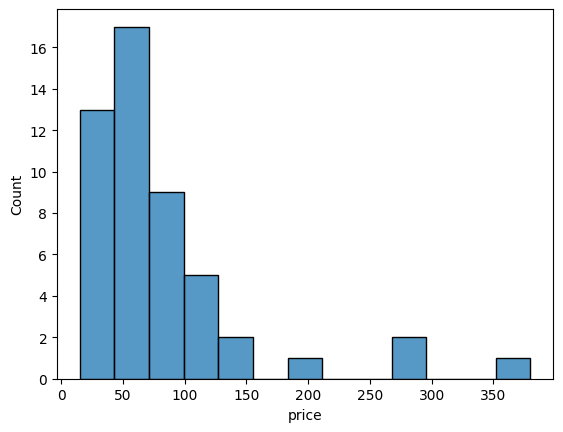

In [124]:
sns.histplot(df['price'][:50])

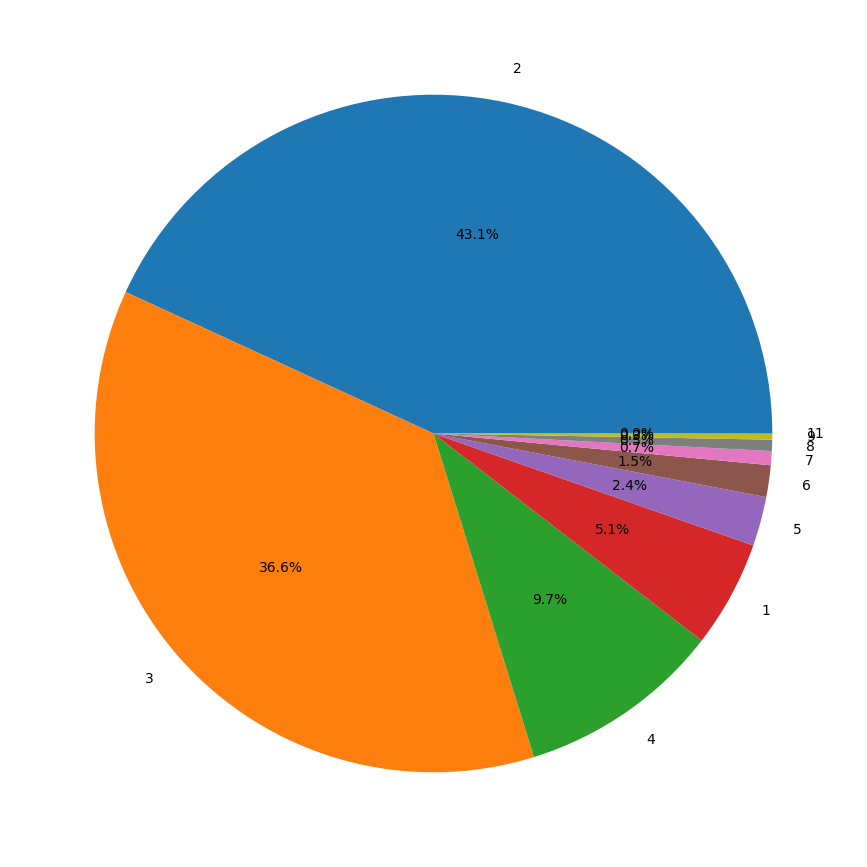

In [125]:
plt.figure(figsize=(25,11))
values=df['size'].value_counts()[:10]
names=df['size'].value_counts().index[:10]
plt.pie(values,labels=names,autopct='%1.1f%%')
plt.show()


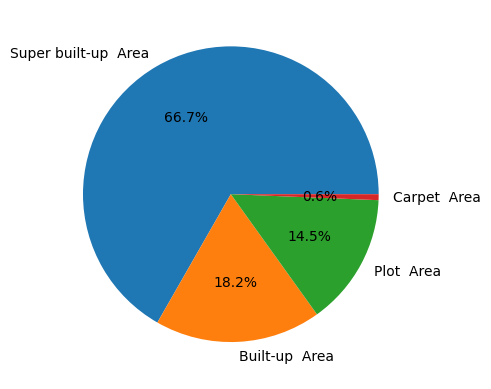

In [126]:

values=df['area_type'].value_counts().values
names=df['area_type'].value_counts().index
plt.pie(values,labels=names,autopct='%1.1f%%')
plt.show()

In [168]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [170]:
from sklearn.preprocessing import LabelEncoder
oh=LabelEncoder()
df['area_type']=oh.fit_transform(df['area_type'])
df['location']=oh.fit_transform(df['location'])



In [171]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [173]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)

In [174]:
x_test_scaled=ss.transform(x_test)

In [175]:
from sklearn.tree import DecisionTreeRegressor

In [176]:
dt=DecisionTreeRegressor()

In [177]:
dt.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [178]:
from sklearn.metrics import r2_score,mean_absolute_error

In [184]:
y_pred_dt=dt.predict(x_test_scaled)
print(r2_score(y_test,y_pred_dt))
print(mean_absolute_error(y_test,y_pred_dt))

0.4339556309938962
39.868948510888124


In [185]:
from sklearn.model_selection import GridSearchCV 

In [186]:
parameters={'criterion':('squared_error','friedman_mse','absolute_error','poisson'),'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7]}

In [187]:
gt=GridSearchCV(dt,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [188]:
gt.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [189]:
gt.best_params_

{'criterion': 'poisson', 'max_depth': 3, 'splitter': 'best'}

In [190]:
y_pred_gt=gt.predict(x_test_scaled)
print(r2_score(y_test,y_pred_gt))
print(mean_absolute_error(y_test,y_pred_gt))

0.5482890081236318
40.86469040250715


In [191]:
from sklearn.svm import SVR

In [192]:
parameters1={'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'gamma':('scale', 'auto') }
gt1=GridSearchCV(SVR(),param_grid=parameters1,cv=5,scoring='neg_mean_squared_error')

In [193]:
gt1.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='neg_mean_squared_error')

In [194]:
y_pred_gt1=gt1.predict(x_test_scaled)

In [39]:
gt1.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [196]:
print(r2_score(y_test,y_pred_gt1))
print(mean_absolute_error(y_test,y_pred_gt1))

0.3408392500348155
39.37617822736865


In [197]:
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge


In [198]:
lr=LinearRegression()

In [199]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [200]:
y_pred_lr=lr.predict(x_test_scaled)
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))

0.3825085363455677
43.174571626339784


In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
r=RandomForestRegressor()

In [203]:
r.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [204]:
y_pred_r=r.predict(x_test_scaled)
print(r2_score(y_test,y_pred_r))
print(mean_absolute_error(y_test,y_pred_lr))

0.6581517160062456
43.174571626339784


In [205]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
ab=AdaBoostRegressor()

In [218]:
ab.fit(x_train_scaled,y_train)
y_pred_ab=ab.predict(x_test_scaled)
print(r2_score(y_test,y_pred_ab))
print(mean_absolute_error(y_test,y_pred_ab))

0.5695834908847325
50.707370382523706


In [219]:
gb=GradientBoostingRegressor()

In [232]:
gb.fit(x_train_scaled,y_train)
y_pred_gb=gb.predict(x_test_scaled)
print(r2_score(y_test,y_pred_gb))
print(mean_absolute_error(y_test,y_pred_gb))

0.6323122233592059
34.49755080834621
